# Análise de Dados com Python

## Fase - Pergunta

***Enem: 1,2 milhão de inscritos faltaram; 376 foram eliminados***

Cerca de 3,9 milhões de pessoas fizeram hoje (3) o Exame Nacional do Ensino Médio (Enem). Os cerca de 1,2 milhão de faltosos representam 23% do total de 5,1 milhões de inscritos. Ao todo, 376 pessoas foram eliminadas por descumprirem as regras do exame. Os dados foram divulgados pelo Ministério da Educação (MEC) e pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep).  

“Deu tudo certo, foi tudo perfeito, funcionou tudo bem. Tivemos a mais baixa abstenção da história”, avaliou o ministro da Educação, Abraham Weintraub.

Fonte: https://agenciabrasil.ebc.com.br/educacao/noticia/2019-11/enem-12-milhao-de-inscritos-faltaram-376-foram-eliminados


Diante dessa baixa ausência, para o ENEM de 2019, os faltosos como estão distribuidos entre estrato social, Cor_Raça informado e tipo de escola (pública ou privada). Individuos das Classes D e E, que se declaram de cor Parda e Preta, formam o grupo dominante dos faltosos?

## Fase - Preparo

Nesta fase, vamos preparar o ambiente para que possamos proceder com nossa análise de dados, executaremos as seguintes etapas:

1 - Importaremos as bibliotecas que utilizaremos em nossa análise;

2 - Prepararemos o ambiente de trabalho;

3 - Baixaremos e armazenaremos de forma apropriada nossos dados.

In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt

In [2]:
#Criar um diretório
os.makedirs('./enem2019', exist_ok=True)

Podemos obter nossos dados por dois caminhos, baixando e descompactando os dados manualmente ou baixando e descompactando via linha de código

In [ ]:
#Caso a sua opção seja a de baixar e descompactar via linha de código

#Criando variável com endereço do arquivo e baixando o arquivo
url = "https://download.inep.gov.br/microdados/microdados_enem_2019.zip"
filebytes = BytesIO(requests.get(url).content)

#Descompactando arquivo no diretório criado anteriormente
myzip = zipfile.ZipFile(filebytes)
myzip.extractall("./enem2019")

Caso tenha optado por baixar e descompactar manualmente, coloque todas as pastas descompactadas, no diretório que criamos anteriormente, o conteúdo baixado são 5 diretórios (DADOS, DICIONÁRIO, LEIA-ME E DOCUMENTOS TÉCNICOS E PROVAS E GABARITOS)

In [3]:
#Vamos criar um DataFrame com os microdados do Enem 2019
enem2019 = pd.read_csv(
    "./enem2019/DADOS/MICRODADOS_ENEM_2019.csv",
    sep=";",
    decimal=",",
    encoding="latin"
)

## Fase - Processo

Nesta fase, vamos preparar o ambiente para que possamos proceder com nossa análise de dados, executaremos a seguinte etapa:

1 - Identificaremos como eles estão organizado, podemos conferir como estão organizados dando uma rápida olhada na estrutura do arquivo, mas no nosso caso, teremos como arquivo norteador o dicionário disponibilizado pelo próprio fornecedor dos dados, o INEP.

In [4]:
#Vamos conferir algumas informações básicas
#como a quantidade de linhas e colunas compõem nosso DataFrame
#quais são sos tipos de dados encontrados
enem2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(21), int64(70), object(45)
memory usage: 5.2+ GB


In [6]:
#Vamos dar uma conferida nas 5 primeiras linhas do nosso DataFrame
enem2019.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


In [7]:
#Depois de conferirmos quantas colunas, linhas e como se distribui os diferentes tipos de dados
#Vamos criar um dicionário, que nos dirá que tipo de dado está populando em cada coluna
dict(enem2019.dtypes)

{'NU_INSCRICAO': dtype('int64'),
 'NU_ANO': dtype('int64'),
 'CO_MUNICIPIO_RESIDENCIA': dtype('int64'),
 'NO_MUNICIPIO_RESIDENCIA': dtype('O'),
 'CO_UF_RESIDENCIA': dtype('int64'),
 'SG_UF_RESIDENCIA': dtype('O'),
 'NU_IDADE': dtype('float64'),
 'TP_SEXO': dtype('O'),
 'TP_ESTADO_CIVIL': dtype('int64'),
 'TP_COR_RACA': dtype('int64'),
 'TP_NACIONALIDADE': dtype('int64'),
 'CO_MUNICIPIO_NASCIMENTO': dtype('float64'),
 'NO_MUNICIPIO_NASCIMENTO': dtype('O'),
 'CO_UF_NASCIMENTO': dtype('float64'),
 'SG_UF_NASCIMENTO': dtype('O'),
 'TP_ST_CONCLUSAO': dtype('int64'),
 'TP_ANO_CONCLUIU': dtype('int64'),
 'TP_ESCOLA': dtype('int64'),
 'TP_ENSINO': dtype('float64'),
 'IN_TREINEIRO': dtype('int64'),
 'CO_ESCOLA': dtype('float64'),
 'CO_MUNICIPIO_ESC': dtype('float64'),
 'NO_MUNICIPIO_ESC': dtype('O'),
 'CO_UF_ESC': dtype('float64'),
 'SG_UF_ESC': dtype('O'),
 'TP_DEPENDENCIA_ADM_ESC': dtype('float64'),
 'TP_LOCALIZACAO_ESC': dtype('float64'),
 'TP_SIT_FUNC_ESC': dtype('float64'),
 'IN_BAIXA_VISA

## Fase - Análise

Nesta fase, vamos preparar o ambiente para que possamos proceder com nossa análise de dados, executaremos as seguintes etapas:

1 - Organizamos e formatamos os dados;

2 - Verificamos cálculos de performance;

3 - Identificamos as tendências e as relações.

In [8]:
#Verificar a distribuição em relação as escolas, em valores absolutos
enem2019.TP_ESCOLA.value_counts() / enem2019.shape[0]

1    0.712303
2    0.244788
3    0.042909
Name: TP_ESCOLA, dtype: float64

In [9]:
#Verificar a distribuição em relação as escolas, em valores relativos
(enem2019.TP_ESCOLA.value_counts() / enem2019.shape[0]) * 100

1    71.230298
2    24.478821
3     4.290882
Name: TP_ESCOLA, dtype: float64

Como ficou percebido, os tipos de escolas são identificados por números, e precisamos recorrer ao dicionário disponibilizado pelo INEP para identificarmos que 1 significa que não foi respondida essa informação pelo inscrito, 2 é pública e 3 privada. Mas podemos melhorar essas informações. 

In [10]:
#Criando uma nova coluna
enem2019['TIPO_ESCOLA'] = ""

In [11]:
#Populando coluna TIPO_ESCOLA a partir de uma filtragem dos dados
#Inicialmente vamos filtrar os dados TP_ESCOLA iguais a 2 e inserir na nova coluna o valor Pública
enem2019.loc[
    enem2019.TP_ESCOLA.isin([2]),
    "TIPO_ESCOLA"
] = "Pública"

#Repetir o processo de filtrar os dados TP_ESCOLA iguais a 3 e inserir na nova coluna o valor Privada
enem2019.loc[
    enem2019.TP_ESCOLA.isin([3]),
    "TIPO_ESCOLA"
] = "Privada"

#Por fim, o processo de filtrar os dados TP_ESCOLA iguais a 1 e 4 e inserir na nova coluna o valor Outros
enem2019.loc[
    enem2019.TP_ESCOLA.isin([1, 4]),
    "TIPO_ESCOLA"
] = "Outros"

In [12]:
#Verificar a distribuição em relação as escolas, em valores relativos, agora da nossa nova coluna
(enem2019.TIPO_ESCOLA.value_counts() / enem2019.shape[0]) * 100

Outros     71.230298
Pública    24.478821
Privada     4.290882
Name: TIPO_ESCOLA, dtype: float64

In [13]:
#Verificar a distribuição em relação ao tipo COR_RACA, em valores absolutos
enem2019.TP_COR_RACA.value_counts() / enem2019.shape[0]

3    0.463972
1    0.359506
2    0.127237
4    0.022798
0    0.020254
5    0.006232
Name: TP_COR_RACA, dtype: float64

Nos deparamos com o mesmo problema que vimos em TP_ESCOLA, os tipos de COR_RACA são identificados por números, e precisamos recorrer ao dicionário disponibilizado pelo INEP para identificarmos, Vamos então melhorar essas informações.

In [14]:
#Criando uma nova coluna
enem2019['TIPO_COR_RACA'] = ""

In [15]:
#Populando coluna TIPO_COR_RACA a partir de uma filtragem dos dados
#Inicialmente vamos filtrar os dados TP_COR_RACA iguais a 0 e inserir na nova coluna o valor Não Declarado
#Repetiremos o mesmo processo para os demais valores
enem2019.loc[
    enem2019.TP_COR_RACA.isin([0]),
    "TIPO_COR_RACA"
]="Não Declarado"

enem2019.loc[
    enem2019.TP_COR_RACA.isin([1]),
    "TIPO_COR_RACA"
]="Branca"

enem2019.loc[
    enem2019.TP_COR_RACA.isin([2]),
    "TIPO_COR_RACA"
]="Preta"

enem2019.loc[
    enem2019.TP_COR_RACA.isin([3]),
    "TIPO_COR_RACA"
]="Parda"

enem2019.loc[
    enem2019.TP_COR_RACA.isin([4]),
    "TIPO_COR_RACA"
]="Amarela"

enem2019.loc[
    enem2019.TP_COR_RACA.isin([5]),
    "TIPO_COR_RACA"
]="Indígena"

In [16]:
#Verificar a distribuição em relação as COR_RACA, em valores relativos, agora da nossa nova coluna
(enem2019.TIPO_COR_RACA.value_counts() / enem2019.shape[0]) * 100

Parda            46.397208
Branca           35.950578
Preta            12.723742
Amarela           2.279801
Não Declarado     2.025428
Indígena          0.623245
Name: TIPO_COR_RACA, dtype: float64

Para nossa análise, temos como problema proposto, verificar o comportamento dos faltosos a partir de duas variáveis dominante (ESCOLA PÚBLICA e PRIVADA), entaão vamos nos ater aos que informaram pertencer a um ou a outro tipo de escola.

In [17]:
#Cirando uma variável com os inscritos que informaram serem de escola públicas
escola_publica = enem2019.loc[
    enem2019.TP_ESCOLA == 2
]

In [18]:
#Verificar a distribuição nas escolas públicas em relação as COR_RACA, em valores relativos
(escola_publica.TIPO_COR_RACA.value_counts() / escola_publica.shape[0]) * 100

Parda            48.274861
Branca           34.094200
Preta            12.382002
Amarela           2.263277
Não Declarado     2.249808
Indígena          0.735852
Name: TIPO_COR_RACA, dtype: float64

In [19]:
#Cirando uma variável com os inscritos que informaram serem de escola privadas
escola_privada = enem2019.loc[
    enem2019.TP_ESCOLA == 3
]

In [20]:
#Verificar a distribuição nas escolas privadas em relação as COR_RACA, em valores relativos
(escola_privada.TIPO_COR_RACA.value_counts() / escola_privada.shape[0]) * 100

Branca           63.750503
Parda            26.039647
Preta             5.403601
Amarela           2.376596
Não Declarado     2.225658
Indígena          0.203996
Name: TIPO_COR_RACA, dtype: float64

Estavamos, até então, analisando os dados dos inscritos para o ENEM de todo os Brasil, vamos regionalizar um pouco. Iremos voltar nossas atenções para os Estados da Bahia, Paraiba e Pernambuco

In [21]:
#Cirando as variáveis com os inscritos que informaram serem de escola públicas e privadas com residência em Pernambuco
esc_pub_pe = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PE") &
    (enem2019.TP_ESCOLA == 2)
]

esc_prv_pe = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PE") &
    (enem2019.TP_ESCOLA == 3)
]

In [22]:
#Cirando as variáveis com os inscritos que informaram serem de escola públicas e privadas com residência em Paraiba
esc_pub_pb = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PB") &
    (enem2019.TP_ESCOLA == 2)
]

esc_prv_pb = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PB") &
    (enem2019.TP_ESCOLA == 3)
]

In [23]:
#Cirando as variáveis com os inscritos que informaram serem de escola públicas e privadas com residência em Bahia
esc_pub_ba = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "BA") &
    (enem2019.TP_ESCOLA == 2)
]

esc_prv_ba = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "BA") &
    (enem2019.TP_ESCOLA == 3)
]

In [25]:
#Verificar a distribuição nas escolas públicas em relação as COR_RACA, em valores relativos
(esc_pub_pe.TIPO_COR_RACA.value_counts() / esc_pub_pe.shape[0]) * 100

Parda            56.227083
Branca           24.044709
Preta            12.375362
Não Declarado     3.010614
Amarela           2.984883
Indígena          1.357350
Name: TIPO_COR_RACA, dtype: float64

In [26]:
#Verificar a distribuição nas escolas privada em relação as COR_RACA, em valores relativos
(esc_prv_pe.TIPO_COR_RACA.value_counts() / esc_prv_pe.shape[0]) * 100

Branca           52.501013
Parda            36.269745
Preta             5.720940
Não Declarado     2.895909
Amarela           2.298501
Indígena          0.313892
Name: TIPO_COR_RACA, dtype: float64

In [27]:
#Verificar a distribuição nas escolas públicas em relação as COR_RACA, em valores relativos
(esc_pub_pb.TIPO_COR_RACA.value_counts() / esc_pub_pb.shape[0]) * 100

Parda            58.964560
Branca           23.679562
Preta            10.642824
Amarela           3.215921
Não Declarado     2.278545
Indígena          1.218589
Name: TIPO_COR_RACA, dtype: float64

In [28]:
#Verificar a distribuição nas escolas privadas em relação as COR_RACA, em valores relativos
(esc_prv_pb.TIPO_COR_RACA.value_counts() / esc_prv_pb.shape[0]) * 100

Branca           45.979717
Parda            42.683810
Preta             5.776892
Amarela           2.734516
Não Declarado     2.263673
Indígena          0.561391
Name: TIPO_COR_RACA, dtype: float64

In [29]:
#Verificar a distribuição nas escolas públicas em relação as COR_RACA, em valores relativos
(esc_pub_ba.TIPO_COR_RACA.value_counts() / esc_pub_ba.shape[0]) * 100

Parda            51.439789
Preta            27.562395
Branca           13.993915
Não Declarado     3.090402
Amarela           2.971734
Indígena          0.941765
Name: TIPO_COR_RACA, dtype: float64

In [30]:
#Verificar a distribuição nas escolas privadas em relação as COR_RACA, em valores relativos
(esc_prv_ba.TIPO_COR_RACA.value_counts() / esc_prv_ba.shape[0]) * 100

Parda            45.394539
Branca           32.478248
Preta            16.149115
Não Declarado     3.172817
Amarela           2.430243
Indígena          0.375038
Name: TIPO_COR_RACA, dtype: float64

Até aqui, conseguimos observar como se distribuem por COR_RACA, os inscritos no ENEM de 2019 dos estados da Bahia, Paraiba e Pernambuco, mas como se comportam tais inscrições vs estrato social?

In [31]:
#Verificar a distribuição em relação ao tipo COR_RACA, em valores absolutos
enem2019.Q006.value_counts() / enem2019.shape[0]

C    0.257389
B    0.249889
D    0.098055
E    0.093335
G    0.059255
A    0.045547
F    0.044404
H    0.037861
I    0.028193
J    0.015856
N    0.012099
K    0.011388
Q    0.011216
O    0.009853
L    0.008673
M    0.008498
P    0.008489
Name: Q006, dtype: float64

Nos deparamos com o mesmo problema com os tipos de respostas, dessa vez sendo identificados por letras, e precisamos recorrer ao dicionário disponibilizado pelo INEP para identificarmos qual letra representa um valor ou intervalo de valores da renda familiar dos inscritos. Mas podemos melhorar essas informações também.

In [32]:
#Criando uma nova coluna
enem2019['TIPO_CLASSE'] = ""

In [33]:
#Populando coluna TIPO_CLASSE a partir de uma filtragem dos dados
#Inicialmente vamos filtrar os dados Q006 iguais a A, B e C e inserir na nova coluna o valor Classe E
#Repetiremos o mesmo processo para os demais valores
enem2019.loc[
    enem2019.Q006.isin(["A", "B", "C"]),
    "TIPO_CLASSE"
] = "Classe E"

enem2019.loc[
    enem2019.Q006.isin(["D", "E"]),
    "TIPO_CLASSE"
] = "Classe D"

enem2019.loc[
    enem2019.Q006.isin(["F", "G", "H"]),
    "TIPO_CLASSE"
] = "Classe C"

enem2019.loc[
    enem2019.Q006.isin(["I", "J", "K", "L", "M"]),
    "TIPO_CLASSE"
] = "Classe B"

enem2019.loc[
    enem2019.Q006.isin(["N", "O", "P", "Q"]),
    "TIPO_CLASSE"
] = "Classe A"

Esse novo processo efetuado criou uma nova tabela em nosso DataFrame principal, enem2019, essa mesma coluna e valores não estão disponiveis em nossa variaves que criamos para visualizar os inscritos nas escolas públicas e privadas da Bahia, Paraiba e Pernambuco

In [34]:
#Cirando as variáveis com os inscritos que informaram serem de escola públicas e privadas com residência em Pernambuco
esc_pub_pe = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PE") &
    (enem2019.TP_ESCOLA == 2)
]

esc_prv_pe = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PE") &
    (enem2019.TP_ESCOLA == 3)
]

#Cirando as variáveis com os inscritos que informaram serem de escola públicas e privadas com residência em Paraiba
esc_pub_pb = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PB") &
    (enem2019.TP_ESCOLA == 2)
]

esc_prv_pb = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PB") &
    (enem2019.TP_ESCOLA == 3)
]

#Cirando as variáveis com os inscritos que informaram serem de escola públicas e privadas com residência em Bahia
esc_pub_ba = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "BA") &
    (enem2019.TP_ESCOLA == 2)
]

esc_prv_ba = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "BA") &
    (enem2019.TP_ESCOLA == 3)
]

Agora vamos observar como se distribuem por TIPO_CLASSE, os inscritos no ENEM de 2019 dos estados da Bahia, Paraiba e Pernambuco

In [35]:
#Verificar a distribuição nas escolas públicas em relação ao TIPO_CLASSE, em valores relativos
(esc_pub_pe.TIPO_CLASSE.value_counts() / esc_pub_pe.shape[0]) * 100

Classe E    83.100675
Classe D    10.286266
Classe C     4.631714
Classe B     1.629141
Classe A     0.352203
Name: TIPO_CLASSE, dtype: float64

In [36]:
#Verificar a distribuição nas escolas privadas em relação as TIPO_CLASSE, em valores relativos
(esc_prv_pe.TIPO_CLASSE.value_counts() / esc_prv_pe.shape[0]) * 100

Classe E    23.552045
Classe C    22.235723
Classe B    19.319563
Classe A    17.628595
Classe D    17.264075
Name: TIPO_CLASSE, dtype: float64

In [37]:
#Verificar a distribuição nas escolas públicas em relação ao TIPO_CLASSE, em valores relativos
(esc_pub_pb.TIPO_CLASSE.value_counts() / esc_pub_pb.shape[0]) * 100

Classe E    86.710892
Classe D     8.403937
Classe C     3.655767
Classe B     1.027508
Classe A     0.201896
Name: TIPO_CLASSE, dtype: float64

In [38]:
#Verificar a distribuição nas escolas privadas em relação as TIPO_CLASSE, em valores relativos
(esc_prv_pb.TIPO_CLASSE.value_counts() / esc_prv_pb.shape[0]) * 100

Classe E    27.834118
Classe C    22.129663
Classe D    20.119522
Classe B    17.348787
Classe A    12.567910
Name: TIPO_CLASSE, dtype: float64

In [39]:
#Verificar a distribuição nas escolas públicas em relação ao TIPO_CLASSE, em valores relativos
(esc_pub_ba.TIPO_CLASSE.value_counts() / esc_pub_ba.shape[0]) * 100

Classe E    81.524497
Classe D    11.140848
Classe C     5.245351
Classe B     1.759812
Classe A     0.329491
Name: TIPO_CLASSE, dtype: float64

In [40]:
#Verificar a distribuição nas escolas privadas em relação as TIPO_CLASSE, em valores relativos
(esc_prv_ba.TIPO_CLASSE.value_counts() / esc_prv_ba.shape[0]) * 100

Classe C    24.377438
Classe E    21.999700
Classe B    20.079508
Classe D    18.039304
Classe A    15.504050
Name: TIPO_CLASSE, dtype: float64

Até aqui, conseguimos observar como se distribuem por COR_RACA e o TIPO_CLASSE, dos inscritos no ENEM de 2019 dos estados da Bahia, Paraiba e Pernambuco, mas como se comportam tais inscrições dos faltosos?

In [41]:
#Atualizando as variáveis com os inscritos faltosos que informaram serem de escola públicas e privadas com residência em Paraiba
esc_pub_pb = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PB") &
    (enem2019.TP_ESCOLA == 2) &
    (enem2019.TP_PRESENCA_CN == 0) &
    (enem2019.TP_PRESENCA_CH == 0) &
    (enem2019.TP_PRESENCA_LC == 0) &
    (enem2019.TP_PRESENCA_MT == 0) 
]

esc_prv_pb = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PB") &
    (enem2019.TP_ESCOLA == 3) &
    (enem2019.TP_PRESENCA_CN == 0) &
    (enem2019.TP_PRESENCA_CH == 0) &
    (enem2019.TP_PRESENCA_LC == 0) &
    (enem2019.TP_PRESENCA_MT == 0) 
]

#Atualizando as variáveis com os inscritos faltosos que informaram serem de escola públicas e privadas com residência em Bahia
esc_pub_ba = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "BA") &
    (enem2019.TP_ESCOLA == 2) &
    (enem2019.TP_PRESENCA_CN == 0) &
    (enem2019.TP_PRESENCA_CH == 0) &
    (enem2019.TP_PRESENCA_LC == 0) &
    (enem2019.TP_PRESENCA_MT == 0) 
]

esc_prv_ba = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "BA") &
    (enem2019.TP_ESCOLA == 3) &
    (enem2019.TP_PRESENCA_CN == 0) &
    (enem2019.TP_PRESENCA_CH == 0) &
    (enem2019.TP_PRESENCA_LC == 0) &
    (enem2019.TP_PRESENCA_MT == 0) 
]

#Atualizando as variáveis com os inscritos faltosos que informaram serem de escola públicas e privadas com residência em Pernambuco
esc_pub_pe = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PE") &
    (enem2019.TP_ESCOLA == 2) &
    (enem2019.TP_PRESENCA_CN == 0) &
    (enem2019.TP_PRESENCA_CH == 0) &
    (enem2019.TP_PRESENCA_LC == 0) &
    (enem2019.TP_PRESENCA_MT == 0) 
]

esc_prv_pe = enem2019.loc[
    (enem2019.SG_UF_RESIDENCIA == "PE") &
    (enem2019.TP_ESCOLA == 3)&
    (enem2019.TP_PRESENCA_CN == 0) &
    (enem2019.TP_PRESENCA_CH == 0) &
    (enem2019.TP_PRESENCA_LC == 0) &
    (enem2019.TP_PRESENCA_MT == 0) 
]

In [42]:
#Verificar a distribuição nas escolas públicas em relação ao TIPO_CLASSE, em valores relativos
(esc_pub_pe.TIPO_CLASSE.value_counts() / esc_pub_pe.shape[0]) * 100

Classe E    92.345870
Classe D     5.657880
Classe C     1.555090
Classe B     0.341899
Classe A     0.099261
Name: TIPO_CLASSE, dtype: float64

In [43]:
#Verificar a distribuição nas escolas privadas em relação as TIPO_CLASSE, em valores relativos
(esc_prv_pe.TIPO_CLASSE.value_counts() / esc_prv_pe.shape[0]) * 100

Classe E    35.807860
Classe A    20.087336
Classe C    17.467249
Classe D    13.537118
Classe B    13.100437
Name: TIPO_CLASSE, dtype: float64

In [44]:
#Verificar a distribuição nas escolas públicas em relação ao TIPO_CLASSE, em valores relativos
(esc_pub_pb.TIPO_CLASSE.value_counts() / esc_pub_pb.shape[0]) * 100

Classe E    93.925973
Classe D     4.492249
Classe C     1.138880
Classe B     0.347991
Classe A     0.094907
Name: TIPO_CLASSE, dtype: float64

In [45]:
#Verificar a distribuição nas escolas privadas em relação as TIPO_CLASSE, em valores relativos
(esc_prv_pb.TIPO_CLASSE.value_counts() / esc_prv_pb.shape[0]) * 100

Classe E    27.848101
Classe A    24.050633
Classe D    18.987342
Classe C    17.721519
Classe B    11.392405
Name: TIPO_CLASSE, dtype: float64

In [46]:
#Verificar a distribuição nas escolas públicas em relação ao TIPO_CLASSE, em valores relativos
(esc_pub_ba.TIPO_CLASSE.value_counts() / esc_pub_ba.shape[0]) * 100

Classe E    90.285162
Classe D     6.814886
Classe C     2.252296
Classe B     0.463992
Classe A     0.183664
Name: TIPO_CLASSE, dtype: float64

In [47]:
#Verificar a distribuição nas escolas privadas em relação as TIPO_CLASSE, em valores relativos
(esc_prv_ba.TIPO_CLASSE.value_counts() / esc_prv_ba.shape[0]) * 100

Classe E    26.821192
Classe A    26.490066
Classe C    17.218543
Classe D    15.231788
Classe B    14.238411
Name: TIPO_CLASSE, dtype: float64

## Fase - Compartilhamento

Vamos gerar alguns graficos das respostas encontradas

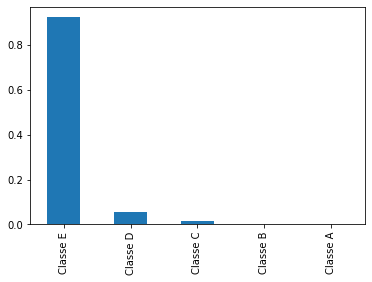

In [49]:
#Vamos criar uma nova variável, e com os dados armazenados nela
faltosos_esc_pub_pe = esc_pub_pe.TIPO_CLASSE.value_counts() / esc_pub_pe.shape[0]
#Vamos gerar ou plotar gráfico do tipo Barra
faltosos_esc_pub_pe.plot(kind = "bar")
#Vamos salvar nosso gráfico
plt.savefig('faltosos_esc_pub_pe.png')

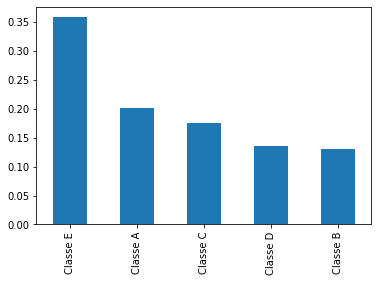

In [50]:
#Vamos criar uma nova variável, e com os dados armazenados nela
faltosos_esc_prv_pe = esc_prv_pe.TIPO_CLASSE.value_counts() / esc_prv_pe.shape[0]
#Vamos gerar ou plotar gráfico do tipo Barra
faltosos_esc_prv_pe.plot(kind = "bar")
#Vamos salvar nosso gráfico
plt.savefig('faltosos_esc_prv_pe.png')

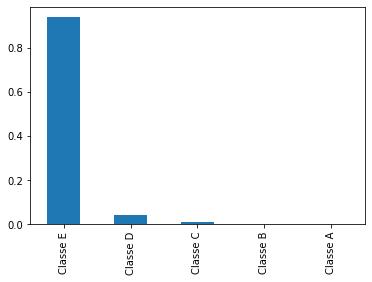

In [51]:
#Vamos criar uma nova variável, e com os dados armazenados nela
faltosos_esc_pub_pb = esc_pub_pb.TIPO_CLASSE.value_counts() / esc_pub_pb.shape[0]
#Vamos gerar ou plotar gráfico do tipo Barra
faltosos_esc_pub_pb.plot(kind = "bar")
#Vamos salvar nosso gráfico
plt.savefig('faltosos_esc_pub_pb.png')

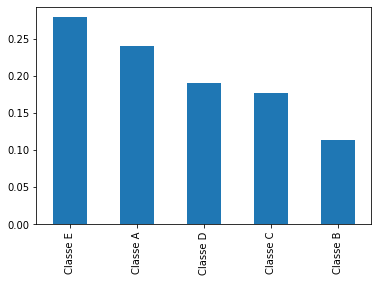

In [52]:
#Vamos criar uma nova variável, e com os dados armazenados nela
faltosos_esc_prv_pb = esc_prv_pb.TIPO_CLASSE.value_counts() / esc_prv_pb.shape[0]
#Vamos gerar ou plotar gráfico do tipo Barra
faltosos_esc_prv_pb.plot(kind = "bar")
#Vamos salvar nosso gráfico
plt.savefig('faltosos_esc_prv_pb.png')

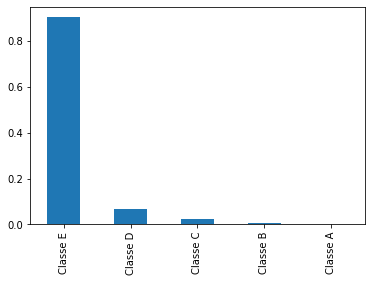

In [53]:
#Vamos criar uma nova variável, e com os dados armazenados nela
faltosos_esc_pub_ba = esc_pub_ba.TIPO_CLASSE.value_counts() / esc_pub_ba.shape[0]
#Vamos gerar ou plotar gráfico do tipo Barra
faltosos_esc_pub_ba.plot(kind = "bar")
#Vamos salvar nosso gráfico
plt.savefig('faltosos_esc_pub_ba.png')

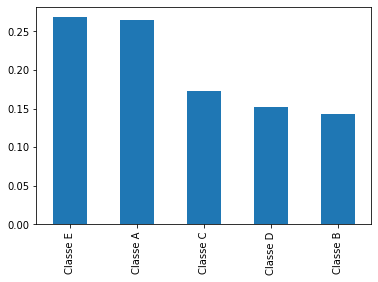

In [54]:
#Vamos criar uma nova variável, e com os dados armazenados nela
faltosos_esc_prv_ba = esc_prv_ba.TIPO_CLASSE.value_counts() / esc_prv_ba.shape[0]
#Vamos gerar ou plotar gráfico do tipo Barra
faltosos_esc_prv_ba.plot(kind = "bar")
#Vamos salvar nosso gráfico
plt.savefig('faltosos_esc_prv_ba.png')

## Conclusão

Agradeço muito a todos que se inscreveram e puderam acompanhar nosso minicurso de análise de dado com Python para cientista social, espero que esse nosso curto momento juntos tenham possibilitado a vocês esclarecimento e curiosidade sobre esse universo que é a ciência de dados.

### Deixo como tarefa final 
*Verifiquem, não mais os faltoso, mas sim quais foram os desempenhos nas provas e redação dos diferentes estratos sociais e dos inscritos das escolas públicas e privadas.*

Um forte abraço turma!